# Data Information
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Additional Variable Information:**
1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name. Nominal.
4. Quantity: The quantities of each product (item) per transaction. Numeric.
5. InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
6. UnitPrice: Unit price. Numeric, Product price per unit in sterling.
7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
8. Country: Country name. Nominal, the name of the country where each customer resides.

# Business Problems
**Business Problems:**

1. **Customer Retention:** How can a company improve customer retention by identifying and understanding its best customers and other customer segments?
2. **Sales Optimization:** How can companies increase sales by analyzing buying patterns and optimizing product offerings?
3. **Customer Segmentation:** How can a company divide its customers into different segments to direct marketing and sales efforts more efficiently?
4. **Product Insights:** Which products are most in demand and provide the greatest profit?

# Objectives

**Objectives:**
1. **Data Overview:** Provides an overview of the dataset, including the distribution of key variables and descriptive statistics.
2. **Data Wrangling:** Cleaning and preparing data for further analysis, including handling missing data, removing duplicates, and handling canceled transactions.
3. **Correlation Analysis:** Analyze the correlation between key variables to understand the relationship between variables, such as the relationship between price per unit and quantity purchased.
4. **Cohort Analysis:** Group customers based on the time of their first purchase and analyze their purchase behavior over time to identify retention trends and repeat purchase behavior.
5. **RFM Segmentation Analysis:** Using RFM (Recency, Frequency, Monetary) analysis to group customers into different segments based on their purchasing behavior. The ultimate goal is to identify the best customers and potential customer segments to optimize.
6. **Clustering Analysis:** Using clustering techniques to group customers into more detailed segments based on RFM features to identify hidden patterns and finer segmentation.

# Get Data

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

# Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from operator import attrgetter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import joblib
from google.colab import files

# Data Overview

In [ ]:
df = pd.concat([X, y], axis=1)

In [ ]:
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.shape

(541909, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [ ]:
df.isnull().sum()

,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.duplicated().sum()

6007

# Data Wrangling

## Handling duplicate data

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

## Fixed Missing Value

In [ ]:
# Handling missing value
df.dropna(subset=['Description', 'CustomerID'], inplace=True)
df.isnull().sum()

,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


## Data Transformation

In [ ]:
# Change the 'InvoiceDate' data type to datetime data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Change the 'CustomerID' data type to integer data type
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
# Create a new column for total sales
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Check & remove negative value
df = df[df['Quantity'] >= 0]
df[['Quantity', 'UnitPrice', 'Revenue']].lt(0).sum()

,0
Quantity,0
UnitPrice,0
Revenue,0


In [ ]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 392657 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  392657 non-null  object        
 1   Quantity     392657 non-null  int64         
 2   InvoiceDate  392657 non-null  datetime64[ns]
 3   UnitPrice    392657 non-null  float64       
 4   CustomerID   392657 non-null  int64         
 5   Country      392657 non-null  object        
 6   Revenue      392657 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 24.0+ MB


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


## Statistical Descriptive

In [ ]:
# descriptive statistics
df[['Quantity', 'UnitPrice', 'Revenue']].describe().round(2)

,Quantity,UnitPrice,Revenue
count,392657.00,392657.00,392657.00
mean,13.15,3.13,22.63
std,181.61,22.24,311.11
min,1.00,0.00,0.00
25%,2.00,1.25,4.95
50%,6.00,1.95,12.45
75%,12.00,3.75,19.80
max,80995.00,8142.75,168469.60


# Correlation Analysis

In [ ]:
df_relevant = df[['Quantity', 'UnitPrice', 'CustomerID', 'Revenue']]
df_relevant.corr()

,Quantity,UnitPrice,CustomerID,Revenue
Quantity,1.000000,-0.004577,-0.006214,0.908877
UnitPrice,-0.004577,1.000000,-0.010788,0.081620
CustomerID,-0.006214,-0.010788,1.000000,-0.003904
Revenue,0.908877,0.081620,-0.003904,1.000000


<Axes: >

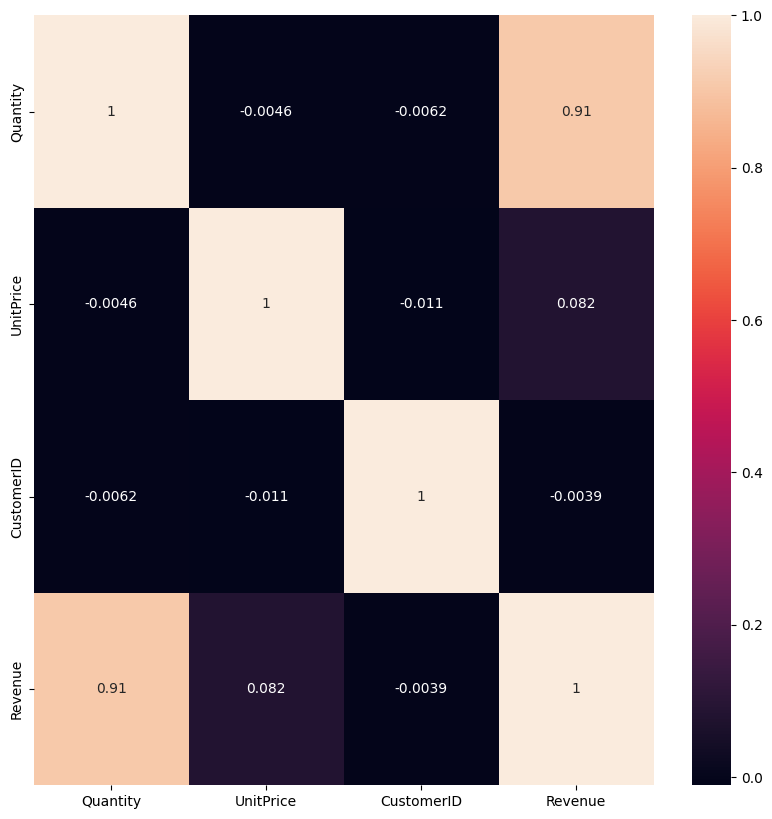

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_relevant.corr(), annot=True)

# Cohort Analysis

## Data Preparation

In [ ]:
# Create a new column by extracting the invoice month from DateInvoice
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period("M")

<ipython-input-42-3cb148fa8025>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period("M")


In [ ]:
# Create a new column to identify the month when the customer was first acquired
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

<ipython-input-43-90a3156ed678>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')


In [ ]:
# Create an index based on the months that customers are active on the platform
df['CohortIndex'] = (df['InvoiceMonth'] - df['CohortMonth']).apply(attrgetter('n'))

## fetching the head
df.head()

<ipython-input-44-6920baf6ea0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortIndex'] = (df['InvoiceMonth'] - df['CohortMonth']).apply(attrgetter('n'))


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010-12,0
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12,0
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010-12,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12,0
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12,0


In [ ]:
# Created a new DataFrame that separates customers based on the month they were acquired and the number of months they were active
cohort_data = df.groupby(['CohortMonth','CohortIndex'])['CustomerID'].nunique().reset_index().rename({'CustomerID':'N_Customers'}, axis = 1)

## fetching the head
cohort_data.head()

,CohortMonth,CohortIndex,N_Customers
0,2010-12,0,885
1,2010-12,1,324
2,2010-12,2,286
3,2010-12,3,340
4,2010-12,4,321


## Pivot Data

In [ ]:
# Pivoting the data to prepare a retention matrix having CohortIndex as columns
cohort_table = cohort_data.pivot_table(columns = "CohortIndex", index="CohortMonth", values = "N_Customers")

## fetching the newly created table
cohort_table

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Retention Matrix

In [ ]:
# Setting the cohort size
cohort_size = cohort_table.iloc[:, 0]

In [ ]:
# Create the retention matrix
retention_matrix = cohort_table.divide(cohort_size, axis=0)

# Showing the matrix
retention_matrix

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualization of Cohort Results

In [ ]:
# Setting the cohort_size to readable format
cohort_size.index = cohort_size.index.strftime('%B %Y')

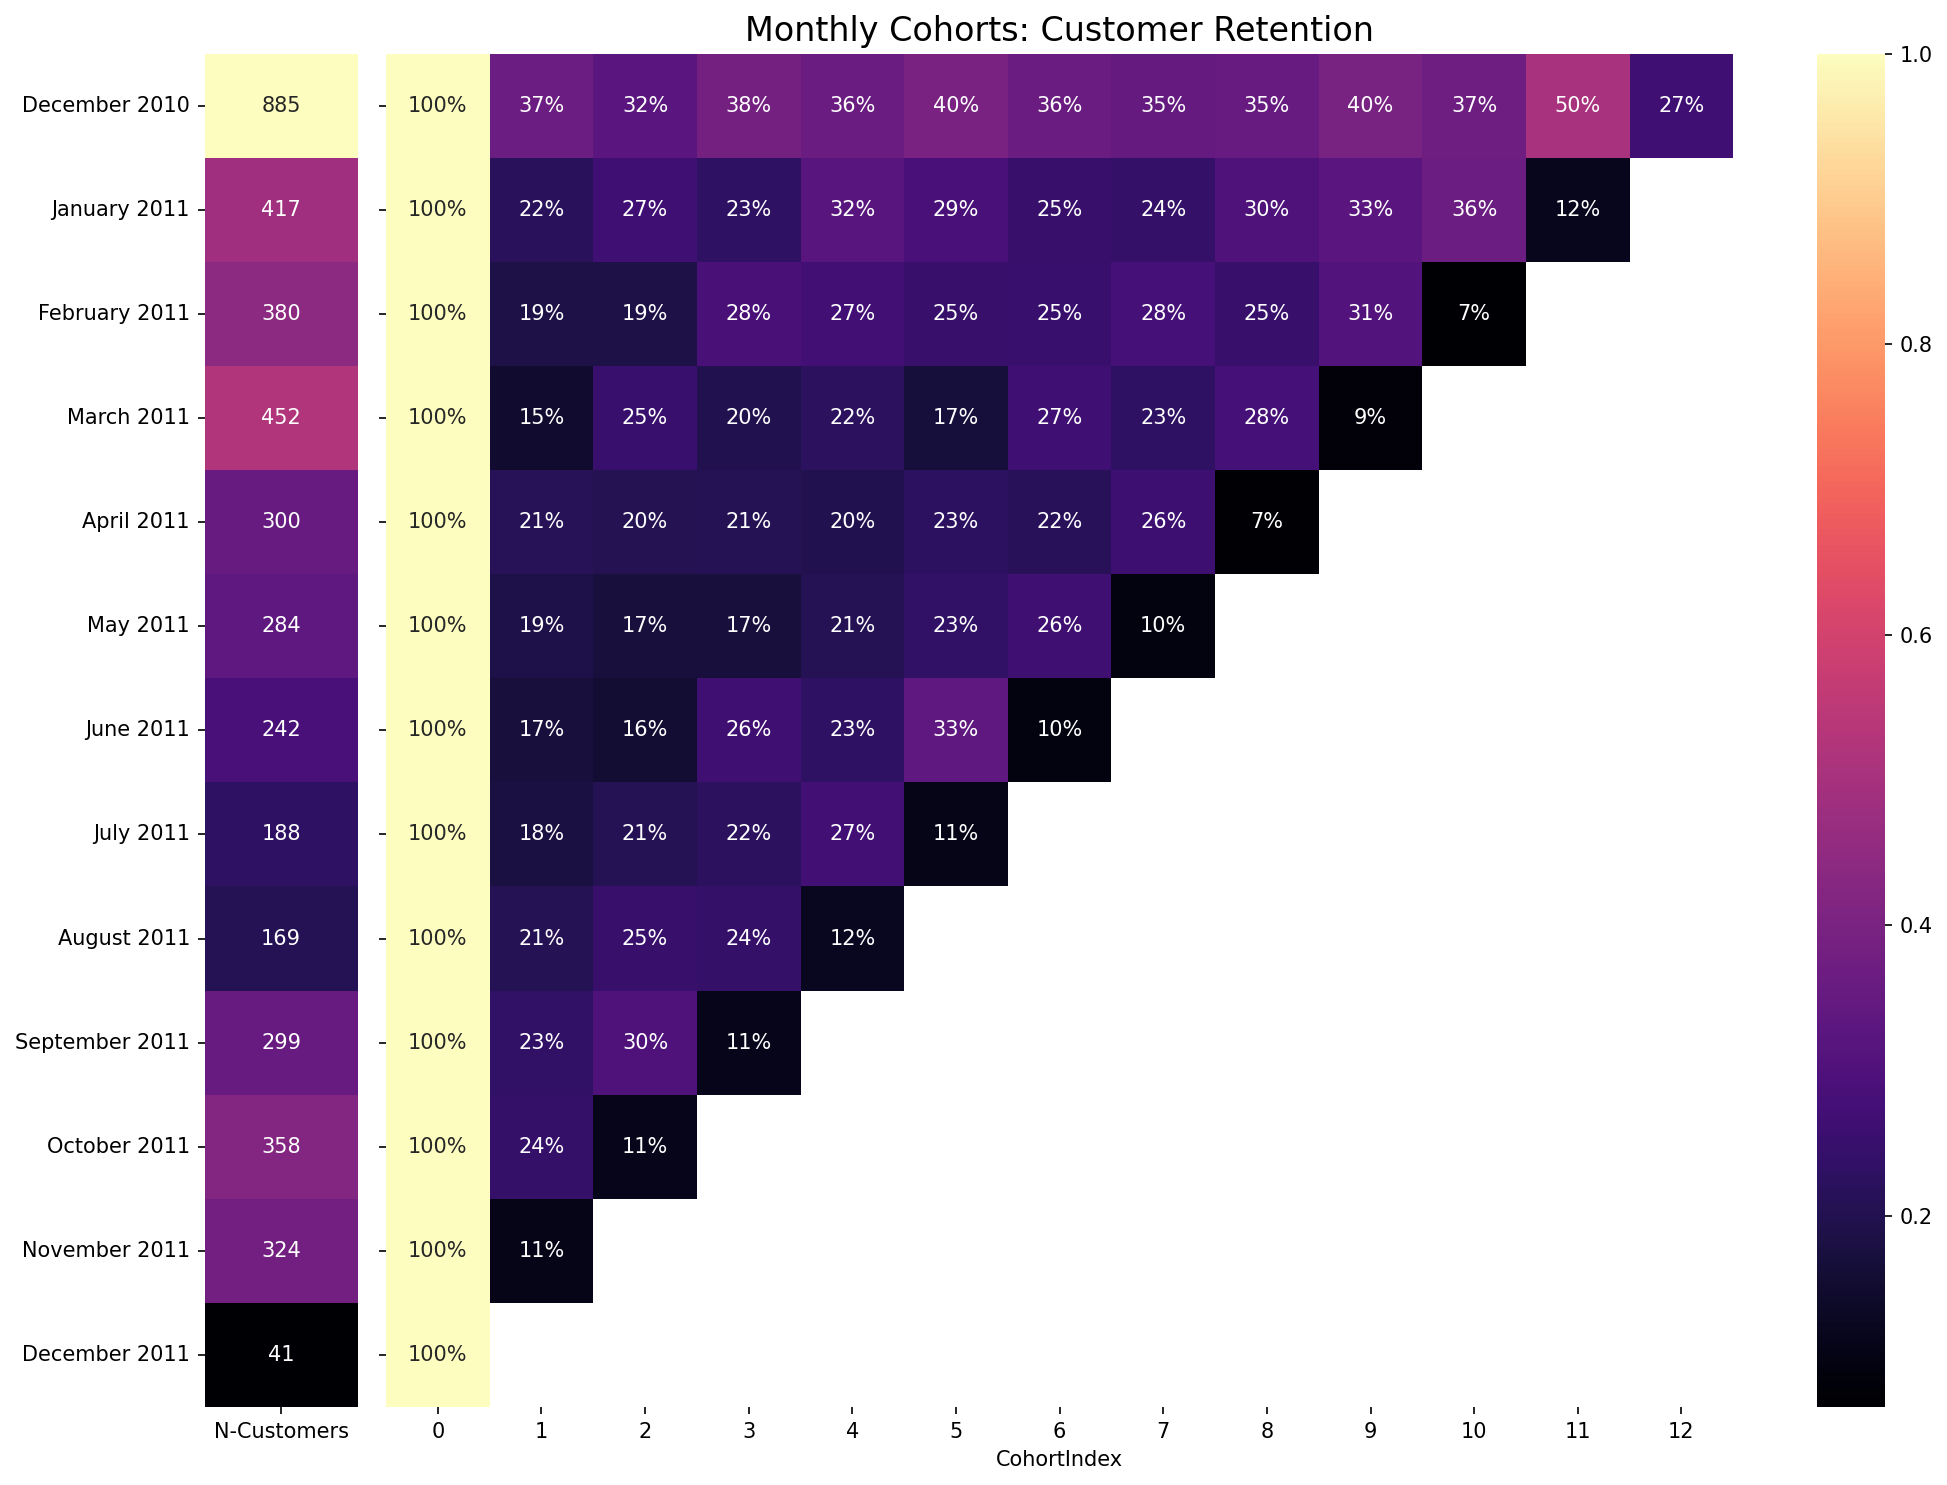

In [ ]:
## plotting the cohort heatmap
fig, ax = plt.subplots(1, 2, figsize=(14, 10), sharey=True, gridspec_kw={'width_ratios': [1, 11]}, dpi = 150)

# retention matrix
sns.heatmap(retention_matrix, mask = retention_matrix.isnull(), annot = True, fmt = '.0%', cmap = sns.color_palette("magma", as_cmap=True), ax = ax[1])
ax[1].set_title('Monthly Cohorts: Customer Retention', fontsize=16)
ax[1].set(ylabel = '')

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns = {0: 'N-Customers'})
sns.heatmap(cohort_size_df, annot = True, cbar = False, fmt = 'g', ax = ax[0], cmap = sns.color_palette("magma", as_cmap=True))
ax[0].set(ylabel = '')

fig.tight_layout()

# RFM Segmentation Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392657 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Description   392657 non-null  object        
 1   Quantity      392657 non-null  int64         
 2   InvoiceDate   392657 non-null  datetime64[ns]
 3   UnitPrice     392657 non-null  float64       
 4   CustomerID    392657 non-null  int64         
 5   Country       392657 non-null  object        
 6   Revenue       392657 non-null  float64       
 7   InvoiceMonth  392657 non-null  period[M]     
 8   CohortMonth   392657 non-null  period[M]     
 9   CohortIndex   392657 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2), period[M](2)
memory usage: 33.0+ MB


## Calculate RFM Metrics

In [ ]:
print("Max date :",df["InvoiceDate"].max())
print("Min date :",df["InvoiceDate"].min())

Max date : 2011-12-09 12:50:00
Min date : 2010-12-01 08:26:00


In [ ]:
# Getting today's date
today_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)

# Calculate Recency
recency_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days
}).reset_index()
recency_df.rename(columns={'InvoiceDate': 'Recency'}, inplace=True)

# Calculate Frequency
frequency_df = df.groupby('CustomerID').size().reset_index(name='Frequency')

# Calculate Monetary
monetary_df = df.groupby('CustomerID').agg({
    'Revenue': 'sum'
}).reset_index()
monetary_df.rename(columns={'Revenue': 'Monetary'}, inplace=True)

# Merge RFM metrics
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

In [ ]:
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,19,73,1757.55
4,12350,310,17,334.40
...,...,...,...,...
4334,18280,278,10,180.60
4335,18281,181,7,80.82
4336,18282,8,12,178.05
4337,18283,4,721,2045.53


## Skoring RFM

In [ ]:
# Determine the RFM score
def rfm_score(df):
    df['R_Score'] = pd.qcut(df['Recency'], 4, labels=False, duplicates='drop') + 1
    df['F_Score'] = pd.qcut(df['Frequency'], 4, labels=False, duplicates='drop') + 1
    df['M_Score'] = pd.qcut(df['Monetary'], 4, labels=False, duplicates='drop') + 1
    return df

rfm_df = rfm_score(rfm_df)

In [ ]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346,326,1,77183.60,4,1,4
1,12347,2,182,4310.00,1,4,4
2,12348,75,31,1797.24,3,2,4
3,12349,19,73,1757.55,2,3,4
4,12350,310,17,334.40,4,1,2
...,...,...,...,...,...,...,...
4334,18280,278,10,180.60,4,1,1
4335,18281,181,7,80.82,4,1,1
4336,18282,8,12,178.05,1,1,1
4337,18283,4,721,2045.53,1,4,4


## Customer Segmentation with RFM

In [ ]:
# Create RFM_Score column
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Segmentation
def segment_customer(row):
    score = row['RFM_Score']
    if score == '111':
        return 'Best Customer'
    elif score in ['112', '122', '211', '222']:
        return 'Potential Customers'
    elif score.endswith('1') and not score.startswith('1'):
        return 'Big Spender'
    elif score.startswith('1') and score[1] == '1':
        return 'Loyal Customers'
    elif score.startswith('1') or score.startswith('2'):
        return 'Others/Recent Shopper'
    elif score.startswith('3'):
        return 'Almost Lost'
    elif score.startswith('4'):
        return 'Lost Customers'
    elif score in ['444', '443', '434']:
        return 'Lost Cheap'
    return 'Unclassified'

rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

In [ ]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,326,1,77183.60,4,1,4,414,Lost Customers
1,12347,2,182,4310.00,1,4,4,144,Others/Recent Shopper
2,12348,75,31,1797.24,3,2,4,324,Almost Lost
3,12349,19,73,1757.55,2,3,4,234,Others/Recent Shopper
4,12350,310,17,334.40,4,1,2,412,Lost Customers
...,...,...,...,...,...,...,...,...,...
4334,18280,278,10,180.60,4,1,1,411,Big Spender
4335,18281,181,7,80.82,4,1,1,411,Big Spender
4336,18282,8,12,178.05,1,1,1,111,Best Customer
4337,18283,4,721,2045.53,1,4,4,144,Others/Recent Shopper


# Merged Dataframe for Clustering

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int)
rfm_df['CustomerID'] = rfm_df['CustomerID'].astype(int)

merged_df = pd.merge(df, rfm_df, on='CustomerID', how='left')

<ipython-input-61-dda363df3164>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392657 entries, 0 to 392656
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Description   392657 non-null  object        
 1   Quantity      392657 non-null  int64         
 2   InvoiceDate   392657 non-null  datetime64[ns]
 3   UnitPrice     392657 non-null  float64       
 4   CustomerID    392657 non-null  int64         
 5   Country       392657 non-null  object        
 6   Revenue       392657 non-null  float64       
 7   InvoiceMonth  392657 non-null  period[M]     
 8   CohortMonth   392657 non-null  period[M]     
 9   CohortIndex   392657 non-null  int64         
 10  Recency       392657 non-null  int64         
 11  Frequency     392657 non-null  int64         
 12  Monetary      392657 non-null  float64       
 13  R_Score       392657 non-null  int64         
 14  F_Score       392657 non-null  int64         
 15  M_Score       392

In [ ]:
merged_df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010-12,0,372,297,5391.21,4,4,4,444,Lost Customers
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12,0,372,297,5391.21,4,4,4,444,Lost Customers
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010-12,0,372,297,5391.21,4,4,4,444,Lost Customers
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12,0,372,297,5391.21,4,4,4,444,Lost Customers
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12,0,372,297,5391.21,4,4,4,444,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392652,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12,2011-08,4,1,52,862.81,1,3,3,133,Others/Recent Shopper
392653,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12,2011-08,4,1,52,862.81,1,3,3,133,Others/Recent Shopper
392654,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011-08,4,1,52,862.81,1,3,3,133,Others/Recent Shopper
392655,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011-08,4,1,52,862.81,1,3,3,133,Others/Recent Shopper


# Clustering Analysis

## Data Preparation

In [ ]:
features = merged_df[['Recency', 'Frequency', 'Monetary']]

# Feature standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Determine the Number of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

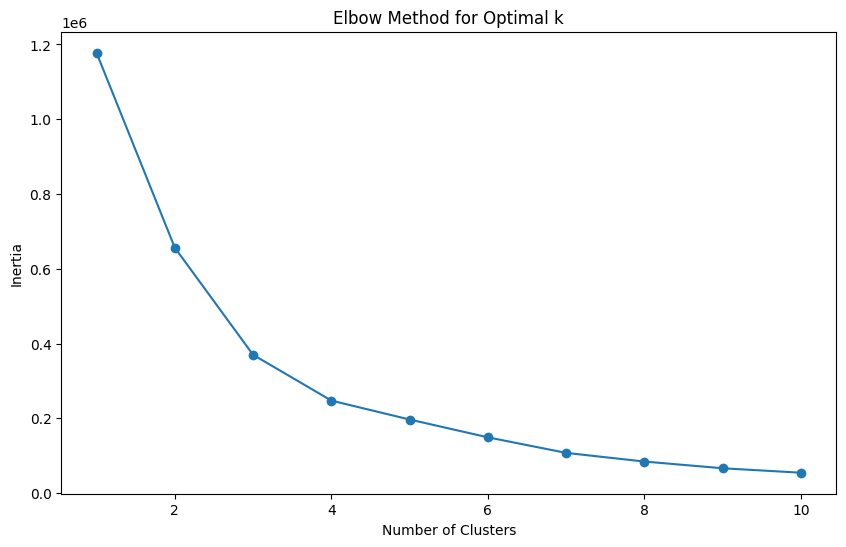

In [ ]:
# Determine the number of clusters with the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

## Training Model K-Means

In [ ]:
# the number of clusters based on elbow graph is 10
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=0)
merged_df['Cluster'] = kmeans.fit_predict(scaled_features)

# View clustering results
merged_df[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Recency,Frequency,Monetary,Cluster
0,17850,372,297,5391.21,2
1,17850,372,297,5391.21,2
2,17850,372,297,5391.21,2
3,17850,372,297,5391.21,2
4,17850,372,297,5391.21,2
...,...,...,...,...,...
392652,12680,1,52,862.81,0
392653,12680,1,52,862.81,0
392654,12680,1,52,862.81,0
392655,12680,1,52,862.81,0


In [ ]:
# save model
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [ ]:
#files.download('kmeans_model.pkl')

## Visualization & Model Evaluation of Clustering Results

Cluster
0    327296
2     37531
3     17198
1     10632
Name: count, dtype: int64


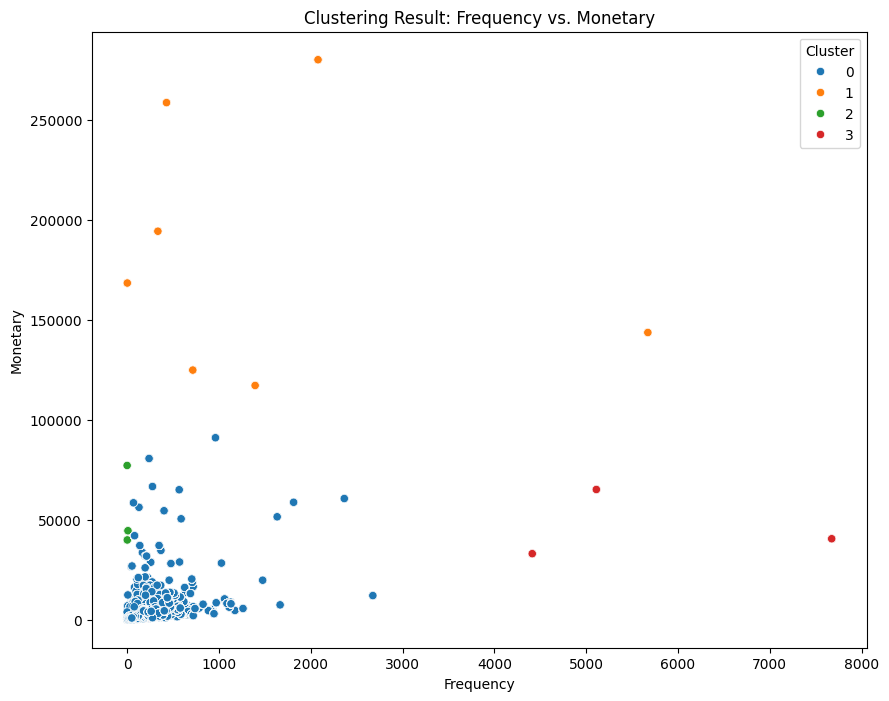

In [ ]:
# Visualization cluster distribution
print(merged_df['Cluster'].value_counts())

plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_df, x='Frequency', y='Monetary', hue='Cluster', palette='tab10', marker='o')
plt.title('Clustering Result: Frequency vs. Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Evaluation of the clustering model
silhouette_avg = silhouette_score(scaled_features, merged_df['Cluster'])
davies_bouldin_avg = davies_bouldin_score(scaled_features, merged_df['Cluster'])
calinski_harabasz_avg = calinski_harabasz_score(scaled_features, merged_df['Cluster'])

print(f'Silhouette Score for {optimal_k} klaster: {silhouette_avg}')
print(f'Davies-Bouldin Index for {optimal_k} klaster: {davies_bouldin_avg}')
print(f'Calinski-Harabasz Index for {optimal_k} klaster: {calinski_harabasz_avg}')

Silhouette Score for 4 klaster: 0.7293728230100346
Davies-Bouldin Index for 4 klaster: 0.6311550942450624
Calinski-Harabasz Index for 4 klaster: 492543.7571361319


**Silhouette Score:**

Silhouette Score is a metric that measures how similar objects in one cluster are compared to objects in another cluster. Values range from -1 to 1, where:
* A value close to 1 indicates that the object is very similar to objects in the same cluster and very different from objects in other clusters.
* A value close to 0 indicates that the object is at the boundary between the two clusters.
* A negative value indicates that the object is more similar to objects in other clusters.

**Interpretation:**
* A value of 0.729 is an excellent value, indicating that the resulting clusters are very compact and distinct from each other.
* This indicates that the clustering model successfully grouped the data well.

**Davies-Bouldin Index:**

The Davies-Bouldin Index measures the average similarity between each cluster and the cluster it is most similar to. Values range from 0 upwards, where lower values are better.

**Interpretation:**

* The value of 0.631 is a low value, indicating that the resulting clusters are different from each other.
* The smaller the index value, the better the separation between clusters.

**Calinski-Harabasz Index:**

Calinski-Harabasz Index (also known as Variance Ratio Criterion) measures the ratio between the number of clusters and the total intra-cluster and inter-cluster variance. Higher values indicate better clusters.

**Interpretation:**

* This very high value indicates that the resulting clusters are excellent, with low intra-cluster variance and high inter-cluster variance.
* This indicates that the clustering model succeeded in maximizing the separation between clusters and minimizing the variance within clusters.

## Cluster analysis

In [ ]:
cluster_summary = merged_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Customer Count'})

print(cluster_summary)

            Recency    Frequency       Monetary  Customer Count
Cluster                                                        
0         24.400084   334.237931    5760.162035          327296
1          4.146633  3692.105907  171932.338681           10632
2        215.118329    78.460926    1044.615129           37531
3          2.337772  6075.541691   45926.912218           17198


# Download Clean Data for Dashboards

In [ ]:
merged_df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010-12,0,372,297,5391.21,4,4,4,444,Lost Customers,2
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12,0,372,297,5391.21,4,4,4,444,Lost Customers,2
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010-12,0,372,297,5391.21,4,4,4,444,Lost Customers,2
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12,0,372,297,5391.21,4,4,4,444,Lost Customers,2
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12,0,372,297,5391.21,4,4,4,444,Lost Customers,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392652,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12,2011-08,4,1,52,862.81,1,3,3,133,Others/Recent Shopper,0
392653,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12,2011-08,4,1,52,862.81,1,3,3,133,Others/Recent Shopper,0
392654,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011-08,4,1,52,862.81,1,3,3,133,Others/Recent Shopper,0
392655,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011-08,4,1,52,862.81,1,3,3,133,Others/Recent Shopper,0


In [ ]:
merged_df.to_csv('merged_df.csv', index=False)
files.download('merged_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Reference
* Chen,Daqing. (2015). Online Retail. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33.
* https://medium.com/@dinichandraa/the-look-e-commerce-customer-segmentation-a45de7d44b20
